In [67]:
# import libraries we need
%pylab inline
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

Populating the interactive namespace from numpy and matplotlib


*This is for simulating correlation data using Monte Carlo.*

First, we make random choice to decide which light source is used.

'\nsingle photon source -> event 0\nthermal source -> event 1\nnothing detected -> event 2\n'

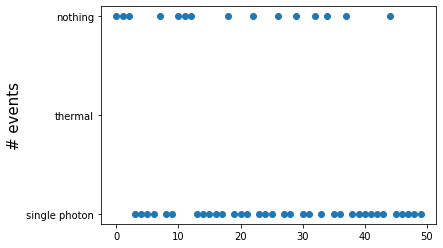

In [68]:
# determine which the light source for each detection

Ndetection = 50    # number of detections
p_sps = 0.70         #  probability of detecting a single photon source
p_thermal = 0.0      # probability of detecting a thermal light source
p_non = 0.30          # probability of getting nothing / 2nd photon is not in the range of abs time range
source = tf.random.categorical(tf.math.log([[p_sps,p_thermal,p_non]]), Ndetection)
plt.scatter(np.arange(Ndetection),source[0])
plt.ylabel('# events',fontsize=15)
plt.yticks([0,1,2],['single photon','thermal','nothing'])
'''
single photon source -> event 0
thermal source -> event 1
nothing detected -> event 2
'''


---

Next, we simulate the single photon source case.

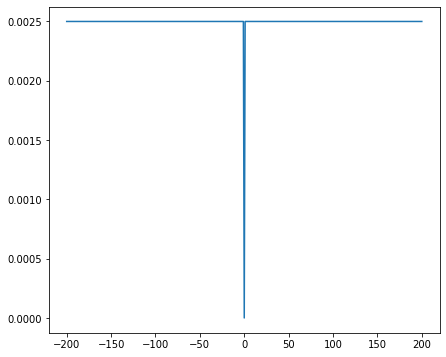

In [243]:
total_bin = 401     # number of total time bins
bin_array = tf.range(total_bin//2 * (-1) ,total_bin//2+1,delta=1,dtype=float32)
bin_n = tf.constant(np.linspace(min(bin_array),-1,total_bin//2),dtype=float32)
bin_p = tf.constant(np.linspace(1,max(bin_array),total_bin//2),dtype=float32)

sps_dist = tfd.MixtureSameFamily(
    mixture_distribution = 
    tfd.Categorical(probs=[bin_n.shape[0]/(total_bin-1),0, bin_p.shape[0]/(total_bin-1)]),
    
    components_distribution = 
    #tfd.Uniform(low=[min(bin_array),-1,1],high=[-1,1,max(bin_array)])
    tfd.Uniform(low=[min(bin_array),0.2,1],high=[0,0.1,max(bin_array)+1])
                       )

sps_prob = sps_dist.prob(bin_array+0.1)
#sps_prob = tf.concat([sps_prob[0],[0],sps_prob[1]],0)
plt.plot(bin_array,sps_prob)
#plt.xlim(-2,2)
plt.show()


In [286]:
counts = 10e6
#samples = tf.cast(sps_dist.sample(counts),dtype=int32)
samples = sps_dist.sample(counts)

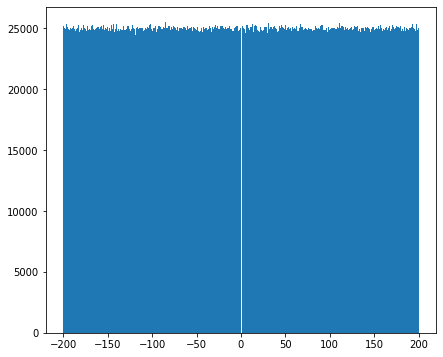

In [287]:
plt.figure(figsize(7,6))
histoinfo=plt.hist(samples.numpy(), bins=np.ndarray.tolist(bin_array.numpy()) )   #np.ndarray.tolist(bin_array.numpy()) )
#plt.xlim(-5,5)

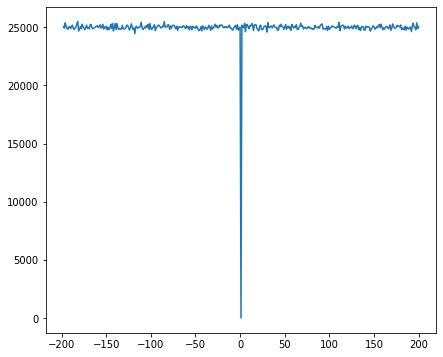

In [290]:
plt.plot(histoinfo[1][2:],histoinfo[0][1:])
#plt.xlim(-2,3)

---
The case we didn't get anything.

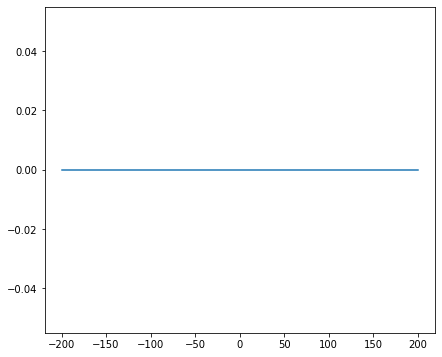

In [8]:
# no photons detected

non_dist = tfd.Uniform(low=1000.,high=1000.0)
non_prob = non_dist.prob([tbin_n,tbin_p])
non_prob = tf.concat([non_prob[0],non_prob[1]],0)
plt.plot(bin_array[1:],non_prob)
plt.show()


---
Combine above situations

In [9]:
total_dist = tfd.Mixture(
    cat = tfd.Categorical(probs=[p_sps,p_non]),
    components = [sps_dist,non_dist] )

simu_samples = tf.cast(total_dist.sample(counts),dtype=int32)

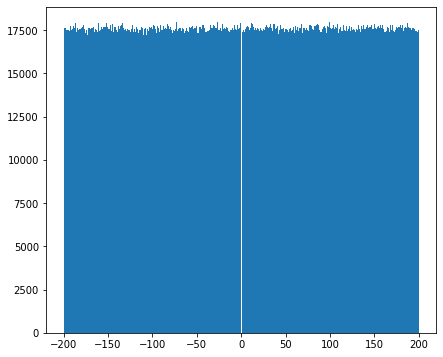

In [10]:
bin_info_total=plt.hist(simu_samples.numpy(), bins=np.ndarray.tolist(bin_array.numpy()) )
#np.ndarray.tolist(bin_array.numpy()) 
plt.savefig('sps')

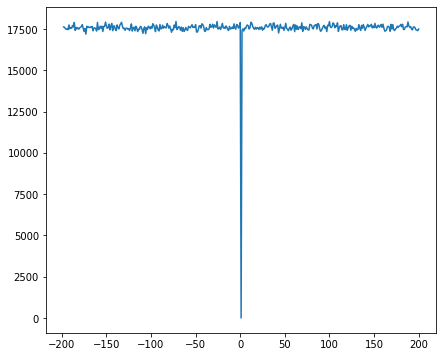

In [11]:
plt.plot(bin_info_total[1][2:],bin_info_total[0][1:])
plt.savefig('sps_')

### check plt.hist

In [ ]:
min(bin_info[1],bin_info[0])

In [46]:
a=bin_info[0][0:]
b=bin_info[1][1:]
b[a==0]

array([-199.,    1.])

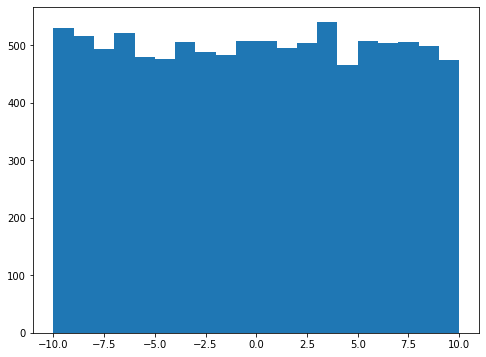

In [306]:
x=np.random.uniform(low=-10,high=10,size=10000)
k=plt.hist(x,bins=np.ndarray.tolist(np.arange(-10,11) ))

In [307]:
k

(array([529., 516., 493., 522., 480., 476., 505., 488., 483., 507., 507.,
        495., 503., 540., 465., 507., 504., 506., 499., 475.]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 <BarContainer object of 20 artists>)

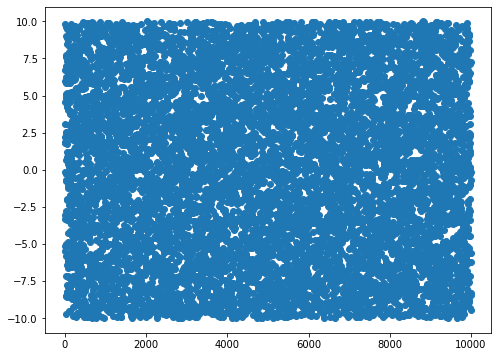

In [309]:
plt.scatter(np.arange(10000),x)

<ipython-input-82-b635f719bac8>:1: DeprecationWarning: This function is deprecated. Please call randint(2, 10 + 1) instead
  x1=np.random.random_integers(low=2,high=10,size=100)


(array([ 7.,  6., 10., 12., 12., 11., 13., 29.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 8 artists>)

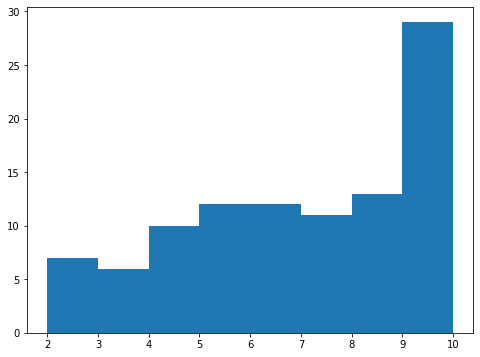

In [82]:
x1=np.random.random_integers(low=2,high=10,size=100)
plt.hist(x1,bins=8)

In [135]:
int(-200.3)

-200

In [ ]:
import tensorflow_probability as tfp
tfd = tfp.distributions

# Define a single scalar Normal distribution.
dist = tfd.Normal(loc=0., scale=3.)

# Evaluate the cdf at 1, returning a scalar.
dist.cdf(1.)

# Define a batch of two scalar valued Normals.
# The first has mean 1 and standard deviation 11, the second 2 and 22.
dist = tfd.Normal(loc=[-2, 2.], scale=[1.,1])

# Evaluate the pdf of the first distribution on 0, and the second on 1.5,
# returning a length two tensor.
dist.prob([-2.,2])

# Get 3 samples, returning a 3 x 2 tensor.
#dist.sample([5])


In [ ]:
# samples has shape [1, 5], where each value is either 0 or 1 with equal
# probability.
samples = tf.random.categorical([[pthermal,psps,pnon]], 50)
plt.scatter(np.arange(50),samples[0])

In [ ]:
samples.numpy()

In [12]:
six_way_multinomial = tfd.Multinomial(total_count=1000., probs=[.3, .25, .2, .15, .08, .02])
six_way_multinomial.log_prob([500., 100., 100., 150., 100., 50.])


<tf.Tensor: shape=(), dtype=float32, numpy=-178.22021>

In [18]:
#six_way_multinomial.log_prob([[500., 100., 100.], [150., 100., 50.]])
tfb = tfp.bijectors
transformed_multinomial = tfd.TransformedDistribution(
    distribution=six_way_multinomial,
    bijector=tfb.Reshape(event_shape_out=[2, 3]))
transformed_multinomial.log_prob([[500., 100., 100.], [150., 100., 50.]])

<tf.Tensor: shape=(), dtype=float32, numpy=-178.22021>